In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

from catboost import CatBoostClassifier

In [2]:
#запускаем метрики и вспомогательные модули 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

#подключение библиотеки для вычисления метрик
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve

#Подгружаем таблички метрик 
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [4]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["rezult4"] # отбираем столбец с откликами

In [5]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [6]:
# Задание базовой модели
model = CatBoostClassifier(random_state = 42)


In [7]:
# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

Learning rate set to 0.079735
0:	learn: 1.2317212	total: 141ms	remaining: 2m 20s
1:	learn: 1.1135770	total: 149ms	remaining: 1m 14s
2:	learn: 1.0185742	total: 157ms	remaining: 52.3s
3:	learn: 0.9429736	total: 165ms	remaining: 41.2s
4:	learn: 0.8705132	total: 173ms	remaining: 34.5s
5:	learn: 0.8183730	total: 182ms	remaining: 30.1s
6:	learn: 0.7661144	total: 194ms	remaining: 27.6s
7:	learn: 0.7209457	total: 203ms	remaining: 25.2s
8:	learn: 0.6843383	total: 213ms	remaining: 23.5s
9:	learn: 0.6504495	total: 223ms	remaining: 22.1s
10:	learn: 0.6185664	total: 231ms	remaining: 20.8s
11:	learn: 0.5901321	total: 240ms	remaining: 19.7s
12:	learn: 0.5644994	total: 249ms	remaining: 18.9s
13:	learn: 0.5392672	total: 257ms	remaining: 18.1s
14:	learn: 0.5178792	total: 265ms	remaining: 17.4s
15:	learn: 0.4986280	total: 273ms	remaining: 16.8s
16:	learn: 0.4794266	total: 281ms	remaining: 16.2s
17:	learn: 0.4658096	total: 289ms	remaining: 15.8s
18:	learn: 0.4519392	total: 297ms	remaining: 15.3s
19:	learn

178:	learn: 0.1089931	total: 1.7s	remaining: 7.8s
179:	learn: 0.1080689	total: 1.71s	remaining: 7.79s
180:	learn: 0.1075149	total: 1.72s	remaining: 7.78s
181:	learn: 0.1066406	total: 1.73s	remaining: 7.76s
182:	learn: 0.1062591	total: 1.74s	remaining: 7.75s
183:	learn: 0.1054900	total: 1.74s	remaining: 7.74s
184:	learn: 0.1048060	total: 1.75s	remaining: 7.72s
185:	learn: 0.1042768	total: 1.76s	remaining: 7.71s
186:	learn: 0.1038017	total: 1.77s	remaining: 7.69s
187:	learn: 0.1034382	total: 1.78s	remaining: 7.68s
188:	learn: 0.1030364	total: 1.78s	remaining: 7.66s
189:	learn: 0.1026399	total: 1.79s	remaining: 7.65s
190:	learn: 0.1025337	total: 1.8s	remaining: 7.63s
191:	learn: 0.1021970	total: 1.81s	remaining: 7.62s
192:	learn: 0.1017267	total: 1.82s	remaining: 7.61s
193:	learn: 0.1011567	total: 1.83s	remaining: 7.59s
194:	learn: 0.1005150	total: 1.83s	remaining: 7.58s
195:	learn: 0.1000894	total: 1.84s	remaining: 7.57s
196:	learn: 0.0997572	total: 1.85s	remaining: 7.55s
197:	learn: 0.0

351:	learn: 0.0545194	total: 3.19s	remaining: 5.87s
352:	learn: 0.0543219	total: 3.19s	remaining: 5.86s
353:	learn: 0.0541125	total: 3.2s	remaining: 5.85s
354:	learn: 0.0539526	total: 3.21s	remaining: 5.84s
355:	learn: 0.0537224	total: 3.22s	remaining: 5.83s
356:	learn: 0.0536232	total: 3.23s	remaining: 5.82s
357:	learn: 0.0534572	total: 3.24s	remaining: 5.81s
358:	learn: 0.0533609	total: 3.25s	remaining: 5.8s
359:	learn: 0.0531525	total: 3.26s	remaining: 5.79s
360:	learn: 0.0530629	total: 3.27s	remaining: 5.78s
361:	learn: 0.0528876	total: 3.28s	remaining: 5.77s
362:	learn: 0.0527247	total: 3.29s	remaining: 5.77s
363:	learn: 0.0525261	total: 3.29s	remaining: 5.76s
364:	learn: 0.0523712	total: 3.3s	remaining: 5.75s
365:	learn: 0.0522336	total: 3.31s	remaining: 5.74s
366:	learn: 0.0519943	total: 3.32s	remaining: 5.73s
367:	learn: 0.0518214	total: 3.33s	remaining: 5.72s
368:	learn: 0.0516472	total: 3.34s	remaining: 5.71s
369:	learn: 0.0514220	total: 3.35s	remaining: 5.7s
370:	learn: 0.05

520:	learn: 0.0335771	total: 4.68s	remaining: 4.3s
521:	learn: 0.0335115	total: 4.69s	remaining: 4.29s
522:	learn: 0.0334049	total: 4.7s	remaining: 4.28s
523:	learn: 0.0333423	total: 4.71s	remaining: 4.28s
524:	learn: 0.0332490	total: 4.71s	remaining: 4.26s
525:	learn: 0.0331153	total: 4.72s	remaining: 4.26s
526:	learn: 0.0329991	total: 4.73s	remaining: 4.25s
527:	learn: 0.0328993	total: 4.74s	remaining: 4.24s
528:	learn: 0.0327640	total: 4.75s	remaining: 4.23s
529:	learn: 0.0326490	total: 4.76s	remaining: 4.22s
530:	learn: 0.0325491	total: 4.76s	remaining: 4.21s
531:	learn: 0.0324798	total: 4.77s	remaining: 4.2s
532:	learn: 0.0323587	total: 4.78s	remaining: 4.19s
533:	learn: 0.0322582	total: 4.79s	remaining: 4.18s
534:	learn: 0.0322003	total: 4.8s	remaining: 4.17s
535:	learn: 0.0321392	total: 4.81s	remaining: 4.16s
536:	learn: 0.0320771	total: 4.81s	remaining: 4.15s
537:	learn: 0.0320221	total: 4.82s	remaining: 4.14s
538:	learn: 0.0319526	total: 4.83s	remaining: 4.13s
539:	learn: 0.03

690:	learn: 0.0232368	total: 6.16s	remaining: 2.75s
691:	learn: 0.0231867	total: 6.16s	remaining: 2.74s
692:	learn: 0.0231173	total: 6.17s	remaining: 2.73s
693:	learn: 0.0230600	total: 6.18s	remaining: 2.73s
694:	learn: 0.0230175	total: 6.19s	remaining: 2.72s
695:	learn: 0.0229584	total: 6.2s	remaining: 2.71s
696:	learn: 0.0229093	total: 6.21s	remaining: 2.7s
697:	learn: 0.0228588	total: 6.22s	remaining: 2.69s
698:	learn: 0.0228171	total: 6.22s	remaining: 2.68s
699:	learn: 0.0227567	total: 6.23s	remaining: 2.67s
700:	learn: 0.0226831	total: 6.24s	remaining: 2.66s
701:	learn: 0.0226274	total: 6.25s	remaining: 2.65s
702:	learn: 0.0225882	total: 6.26s	remaining: 2.64s
703:	learn: 0.0225515	total: 6.27s	remaining: 2.63s
704:	learn: 0.0224972	total: 6.28s	remaining: 2.63s
705:	learn: 0.0224306	total: 6.29s	remaining: 2.62s
706:	learn: 0.0224043	total: 6.3s	remaining: 2.61s
707:	learn: 0.0223713	total: 6.31s	remaining: 2.6s
708:	learn: 0.0223322	total: 6.32s	remaining: 2.59s
709:	learn: 0.02

856:	learn: 0.0173676	total: 7.62s	remaining: 1.27s
857:	learn: 0.0173281	total: 7.63s	remaining: 1.26s
858:	learn: 0.0172959	total: 7.64s	remaining: 1.25s
859:	learn: 0.0172607	total: 7.65s	remaining: 1.25s
860:	learn: 0.0172284	total: 7.66s	remaining: 1.24s
861:	learn: 0.0171953	total: 7.67s	remaining: 1.23s
862:	learn: 0.0171727	total: 7.67s	remaining: 1.22s
863:	learn: 0.0171272	total: 7.68s	remaining: 1.21s
864:	learn: 0.0171099	total: 7.69s	remaining: 1.2s
865:	learn: 0.0170856	total: 7.7s	remaining: 1.19s
866:	learn: 0.0170708	total: 7.71s	remaining: 1.18s
867:	learn: 0.0170460	total: 7.72s	remaining: 1.17s
868:	learn: 0.0170186	total: 7.72s	remaining: 1.16s
869:	learn: 0.0169833	total: 7.73s	remaining: 1.16s
870:	learn: 0.0169554	total: 7.74s	remaining: 1.15s
871:	learn: 0.0169391	total: 7.75s	remaining: 1.14s
872:	learn: 0.0169169	total: 7.76s	remaining: 1.13s
873:	learn: 0.0168950	total: 7.76s	remaining: 1.12s
874:	learn: 0.0168728	total: 7.77s	remaining: 1.11s
875:	learn: 0.

In [11]:
# Получаем предсказания модели на тестовых данных
y_pred = model.predict(X_test)


In [12]:
# Измерение площади под ROC-кривой
y_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.9629326627789305


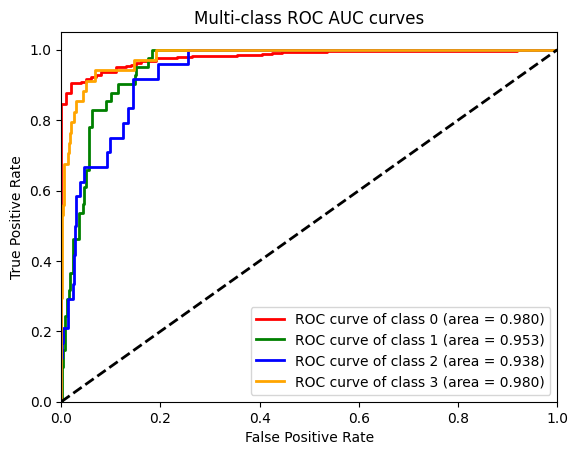

In [13]:
from sklearn.preprocessing import label_binarize

# Перевод меток классов в формат one-vs-all
y_test_b = label_binarize(y_test, classes=[0, 1, 2, 3])

# Вычисление значений кривых ROC AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение кривых ROC AUC для всех классов
plt.figure()
colors = ['red', 'green', 'blue', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.3f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC AUC curves')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Вывод метрик модели
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9470    0.9825    0.9644       400
           1     0.5882    0.4878    0.5333        41
           2     0.5455    0.2500    0.3429        24
           3     0.6923    0.7941    0.7397        34

    accuracy                         0.8938       499
   macro avg     0.6932    0.6286    0.6451       499
weighted avg     0.8808    0.8938    0.8838       499



In [15]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Confusion Matrix:
[[393   5   0   2]
 [ 14  20   2   5]
 [  5   8   6   5]
 [  3   1   3  27]]


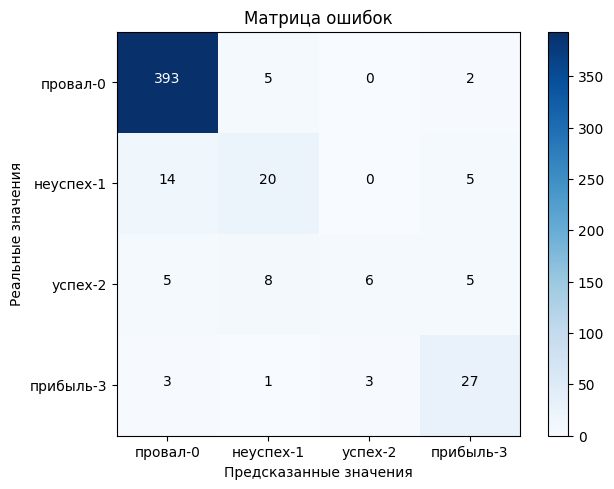

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Создаем матрицу ошибок
confusion_matrix = np.array([[393, 5, 0, 2],
                             [14, 20, 0, 5],
                             [5, 8, 6, 5],
                             [3, 1, 3, 27]])

# Создаем список меток классов
labels = ["провал-0", "неуспех-1", "успех-2", "прибыль-3"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")

plt.show()